# ***Overview***

*This project focuses on predicting future sales for Rossmann Pharmaceuticals' stores using a combination of machine learning and deep learning techniques. The project aims to deliver actionable sales forecasts, allowing the finance team to plan and allocate resources efficiently. The solution includes detailed exploratory data analysis, machine learning modeling, deep learning with LSTM for time series prediction, and serving the predictions through a web API.*

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sys
sys.path.append("../scripts")

import preprocessing 
import data_exploration as de 

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')



#### ***Load Data***

In [2]:
### Load Data from CSV file

df_test = preprocessing.load_data("../data/test.csv")
df_train = preprocessing.load_data("../data/train.csv")
df_store = preprocessing.load_data("../data/store.csv")

2025-01-03 21:13:35,494 - INFO - Loading data from CSV file >>> 
2025-01-03 21:13:35,796 - INFO - Data Loaded Successfully!!
2025-01-03 21:13:35,808 - INFO - Loading data from CSV file >>> 
2025-01-03 21:13:37,127 - INFO - Data Loaded Successfully!!
2025-01-03 21:13:37,128 - INFO - Loading data from CSV file >>> 
2025-01-03 21:13:37,162 - INFO - Data Loaded Successfully!!


In [3]:
df_test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [4]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


##### ***Merge Train and Test Data with Store Data***

*The Store Data contains important Information about the stores including store type, assortment, and Holidays. It's Important to merge The test and Train data with Store data for exploratory data analysis.*

In [6]:
## Merge Store and Test Data
df_test_merged = pd.merge(df_store, df_test, on='Store')
df_test_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Id,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,4,2015-09-17,1.0,1,0,0
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,857,3,2015-09-16,1.0,1,0,0
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1713,2,2015-09-15,1.0,1,0,0
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2569,1,2015-09-14,1.0,1,0,0
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3425,7,2015-09-13,0.0,0,0,0


In [7]:
## Merge Training data with Store data
df_train_merged = pd.merge(df_store, df_train, on='Store')
df_train_merged.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,5,2015-07-31,5263,555,1,1,0,1
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,4,2015-07-30,5020,546,1,1,0,1
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3,2015-07-29,4782,523,1,1,0,1
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,2,2015-07-28,5011,560,1,1,0,1
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,1,2015-07-27,6102,612,1,1,0,1


##### ***General Information***

In [8]:
## Information about the Test dataset
df_test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      41088 non-null  int64  
 1   StoreType                  41088 non-null  object 
 2   Assortment                 41088 non-null  object 
 3   CompetitionDistance        40992 non-null  float64
 4   CompetitionOpenSinceMonth  25872 non-null  float64
 5   CompetitionOpenSinceYear   25872 non-null  float64
 6   Promo2                     41088 non-null  int64  
 7   Promo2SinceWeek            23856 non-null  float64
 8   Promo2SinceYear            23856 non-null  float64
 9   PromoInterval              23856 non-null  object 
 10  Id                         41088 non-null  int64  
 11  DayOfWeek                  41088 non-null  int64  
 12  Date                       41088 non-null  object 
 13  Open                       41077 non-null  flo

In [9]:
## Information about the Train dataset
df_train_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   StoreType                  1017209 non-null  object 
 2   Assortment                 1017209 non-null  object 
 3   CompetitionDistance        1014567 non-null  float64
 4   CompetitionOpenSinceMonth  693861 non-null   float64
 5   CompetitionOpenSinceYear   693861 non-null   float64
 6   Promo2                     1017209 non-null  int64  
 7   Promo2SinceWeek            509178 non-null   float64
 8   Promo2SinceYear            509178 non-null   float64
 9   PromoInterval              509178 non-null   object 
 10  DayOfWeek                  1017209 non-null  int64  
 11  Date                       1017209 non-null  object 
 12  Sales                      1017209 non-null  int64  
 13  Customers   

##### ***Handle Missing Values***

In [10]:
## Check for Missing Values in Test data
df_test_merged.isnull().sum()

Store                            0
StoreType                        0
Assortment                       0
CompetitionDistance             96
CompetitionOpenSinceMonth    15216
CompetitionOpenSinceYear     15216
Promo2                           0
Promo2SinceWeek              17232
Promo2SinceYear              17232
PromoInterval                17232
Id                               0
DayOfWeek                        0
Date                             0
Open                            11
Promo                            0
StateHoliday                     0
SchoolHoliday                    0
dtype: int64

In [11]:
## Check for Missing Values in Train data
df_train_merged.isnull().sum()

Store                             0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
dtype: int64

*In both datasets the missing values arise almost entirely from the store data columns.*

- *Let's replace The missing Values in the competition distance column with zero by assuming there no competitors for the missing values*
- *The missing values in Month and Year Competition started can be filled with 0 and 1900 by assuming it's unknown*
- *The missing values in Promo2 Week and Year are the result of Promo2 not being implemented Let's Replace them with 0 and 1900 when Promo2 is not being implemented*
- *The missing values in Promo2 Interval is the result of Promo2 not being implemented Let's Replace it with "Unknown" when Promo2 is not being implemented*

In [12]:
## Handle Missing Values for Test data
preprocessing.replace_missing_values(df_test_merged)

2025-01-03 21:13:39,212 - INFO - Handling Missing Values >>> 
2025-01-03 21:13:39,257 - INFO - Missing Value Handled!!


In [13]:
## Handle Missing Values for Train data
preprocessing.replace_missing_values(df_train_merged)

2025-01-03 21:13:39,335 - INFO - Handling Missing Values >>> 
2025-01-03 21:13:39,472 - INFO - Missing Value Handled!!


In [14]:
## Check for missing Values
df_test_merged.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
Id                           0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

In [15]:
## Check for missing Values
df_train_merged.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
dtype: int64

##### ***Change data types***

*Some of The columns datatype are not in a proper format let's change them to the proper one*

In [16]:
## Change data types for Test data
preprocessing.change_datatypes(df_test_merged)

2025-01-03 21:13:39,849 - INFO - Changin Data Types to appropriate format >>> 
2025-01-03 21:13:40,682 - INFO - Data types Changed Successfully


In [17]:
## Change data types for Test data
preprocessing.change_datatypes(df_train_merged)

2025-01-03 21:13:40,746 - INFO - Changin Data Types to appropriate format >>> 
2025-01-03 21:13:41,102 - INFO - Data types Changed Successfully


##### ***Statistical Summary***

In [18]:
## Summary statistics for Test data
df_test_merged.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Id,DayOfWeek,Date,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,4.108800e+04,41088,41088.000000,41088.000000,4.108800e+04,41088.000000,41088.000000,41088,41088.000000,41088.000000,41088.000000
mean,555.899533,5076.693925,-5.020193e+16,1968-05-29 23:01:07.289719624,0.580607,14.182243,-1.601682e+17,20544.500000,3.979167,2015-08-24 12:00:00,0.854361,0.395833,0.443487
min,1.000000,0.000000,-2.208989e+18,1900-01-01 00:00:00,0.000000,0.000000,-2.208989e+18,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000
25%,279.750000,710.000000,-2.208989e+18,1900-01-01 00:00:00,0.000000,0.000000,-2.208989e+18,10272.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000
50%,553.500000,2410.000000,1.104538e+18,2005-01-01 00:00:00,1.000000,9.000000,1.262304e+18,20544.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000
75%,832.250000,6435.000000,1.293840e+18,2011-01-01 00:00:00,1.000000,31.000000,1.325376e+18,30816.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000
max,1115.000000,75860.000000,1.420070e+18,2015-01-01 00:00:00,1.000000,49.000000,1.420070e+18,41088.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000
std,320.274496,7221.221850,1.664475e+18,NaN,0.493466,16.177932,1.741794e+18,11861.228267,2.015481,NaN,0.352748,0.489035,0.496802


In [19]:
## Summary statistics for Train data
df_test_merged.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Id,DayOfWeek,Date,Open,Promo,SchoolHoliday
count,41088.000000,41088.000000,4.108800e+04,41088,41088.000000,41088.000000,4.108800e+04,41088.000000,41088.000000,41088,41088.000000,41088.000000,41088.000000
mean,555.899533,5076.693925,-5.020193e+16,1968-05-29 23:01:07.289719624,0.580607,14.182243,-1.601682e+17,20544.500000,3.979167,2015-08-24 12:00:00,0.854361,0.395833,0.443487
min,1.000000,0.000000,-2.208989e+18,1900-01-01 00:00:00,0.000000,0.000000,-2.208989e+18,1.000000,1.000000,2015-08-01 00:00:00,0.000000,0.000000,0.000000
25%,279.750000,710.000000,-2.208989e+18,1900-01-01 00:00:00,0.000000,0.000000,-2.208989e+18,10272.750000,2.000000,2015-08-12 18:00:00,1.000000,0.000000,0.000000
50%,553.500000,2410.000000,1.104538e+18,2005-01-01 00:00:00,1.000000,9.000000,1.262304e+18,20544.500000,4.000000,2015-08-24 12:00:00,1.000000,0.000000,0.000000
75%,832.250000,6435.000000,1.293840e+18,2011-01-01 00:00:00,1.000000,31.000000,1.325376e+18,30816.250000,6.000000,2015-09-05 06:00:00,1.000000,1.000000,1.000000
max,1115.000000,75860.000000,1.420070e+18,2015-01-01 00:00:00,1.000000,49.000000,1.420070e+18,41088.000000,7.000000,2015-09-17 00:00:00,1.000000,1.000000,1.000000
std,320.274496,7221.221850,1.664475e+18,NaN,0.493466,16.177932,1.741794e+18,11861.228267,2.015481,NaN,0.352748,0.489035,0.496802


### ***Exploratory Data Analysis***

##### ***Test Data Distribution***

In [20]:
## Initialize DataExploration class
de_test = de.DataExploration(df_test_merged)

2025-01-03 21:13:45,638 - INFO - Ploting Distribution graphs for Test Data ... 
2025-01-03 21:13:47,825 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:47,857 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:48,818 - INFO - Distribution graph Ploted!!


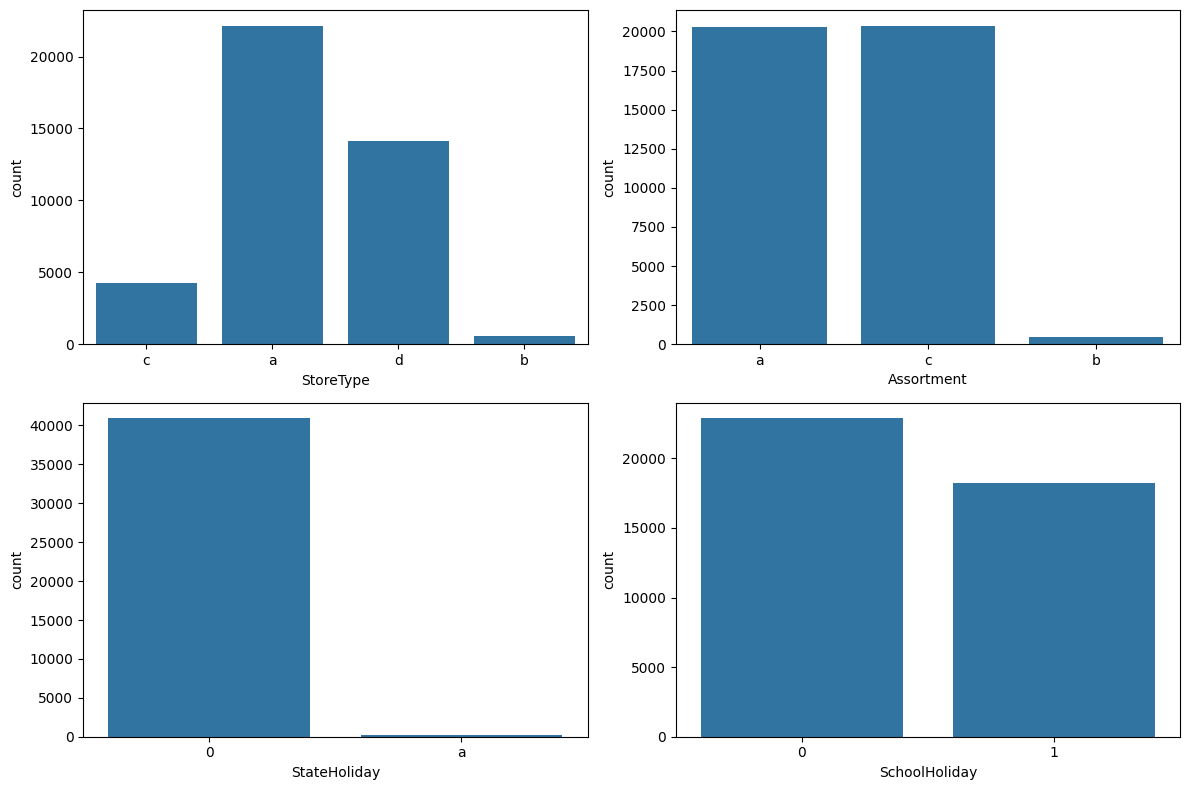

In [21]:
## Plot Data Distribution for test data
de_test.test_data_distribution_1()

2025-01-03 21:13:49,728 - INFO - Ploting Distribution graphs for Test Data ... 
2025-01-03 21:13:49,874 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:49,941 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:50,048 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:50,120 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:13:50,245 - IN

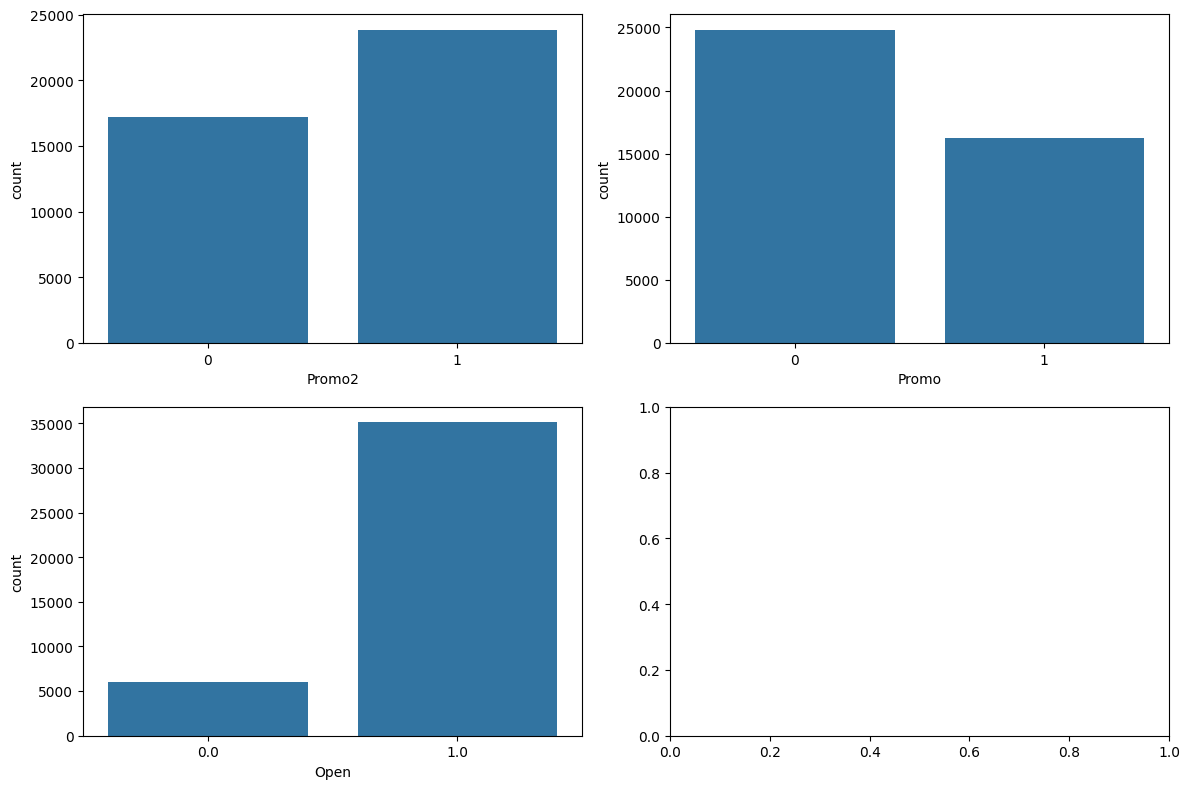

In [22]:
## Plot Distribution of Test data
de_test.test_data_distribution_2()

##### ***Training Data Analysis***

In [23]:
## Initialize DataExploration class
de_train = de.DataExploration(df_train_merged)

2025-01-03 21:13:52,399 - INFO - Ploting Distribution graphs for Training Data ... 
2025-01-03 21:14:01,479 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:01,920 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:02,215 - INFO - Distribution graph Ploted!!


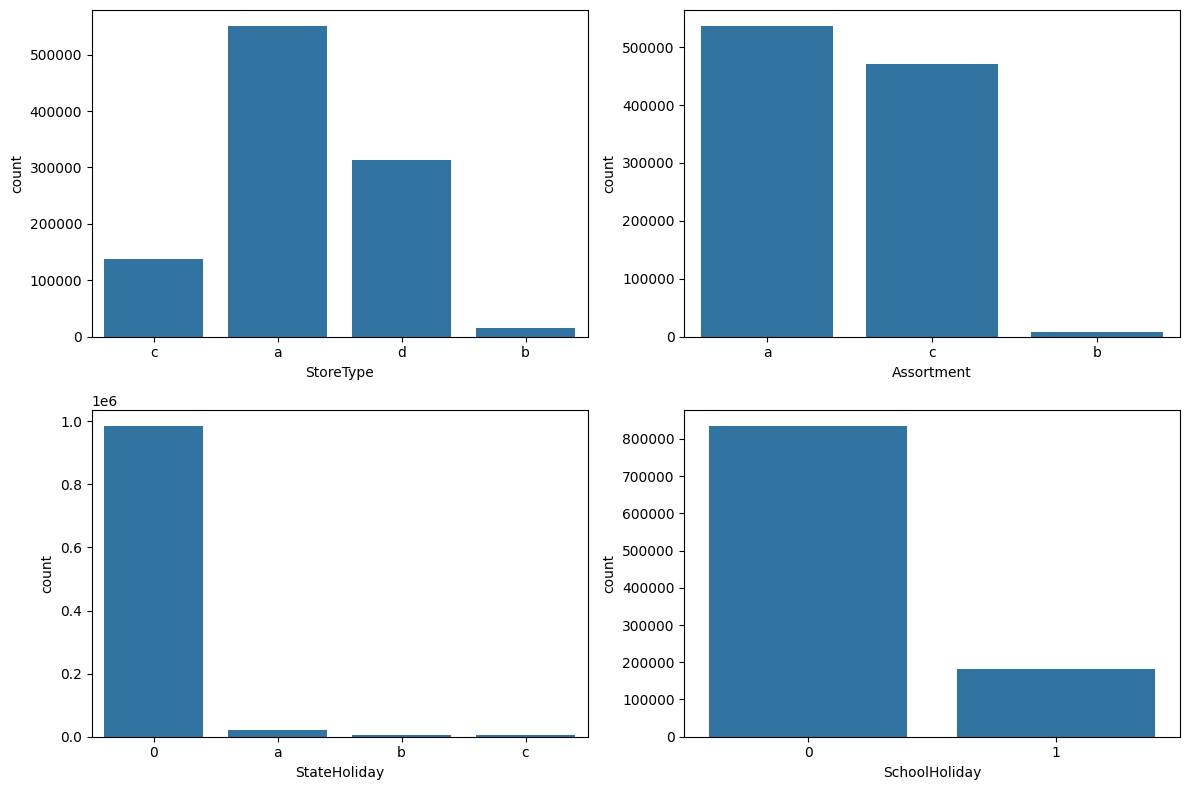

In [24]:
## Test Data Distribution Plot 
de_train.train_data_distribution_1()

2025-01-03 21:14:02,430 - INFO - Ploting Distribution graphs for Training Data ... 
2025-01-03 21:14:02,997 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:03,462 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:04,172 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:04,579 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:05,268 

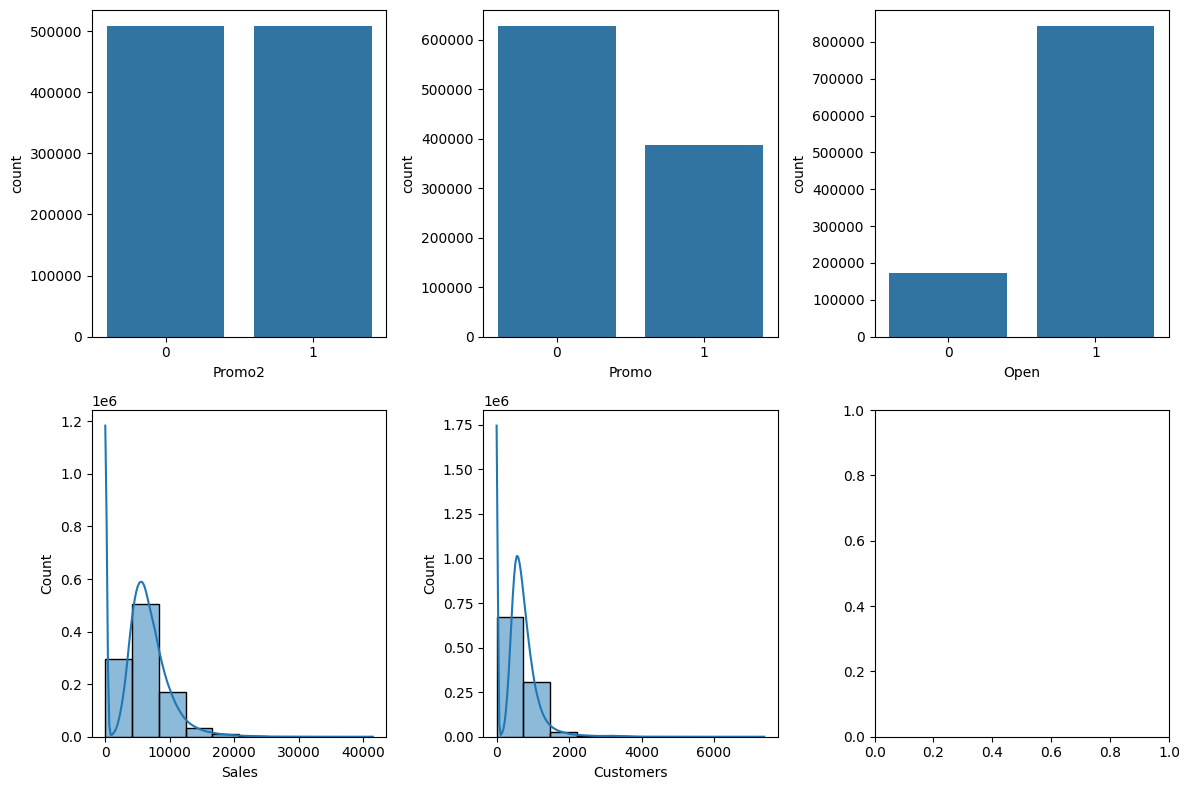

In [25]:
## Distribution Analysis
de_train.train_data_distribution_2()

#### ***Key Insight***

*The Promo distribution in both Test and Training Data Seems to be similarly distributed as in the graphs above*

2025-01-03 21:14:16,789 - INFO - Ploting Box Plots ... 


2025-01-03 21:14:19,083 - INFO - Box Plot plotted!!


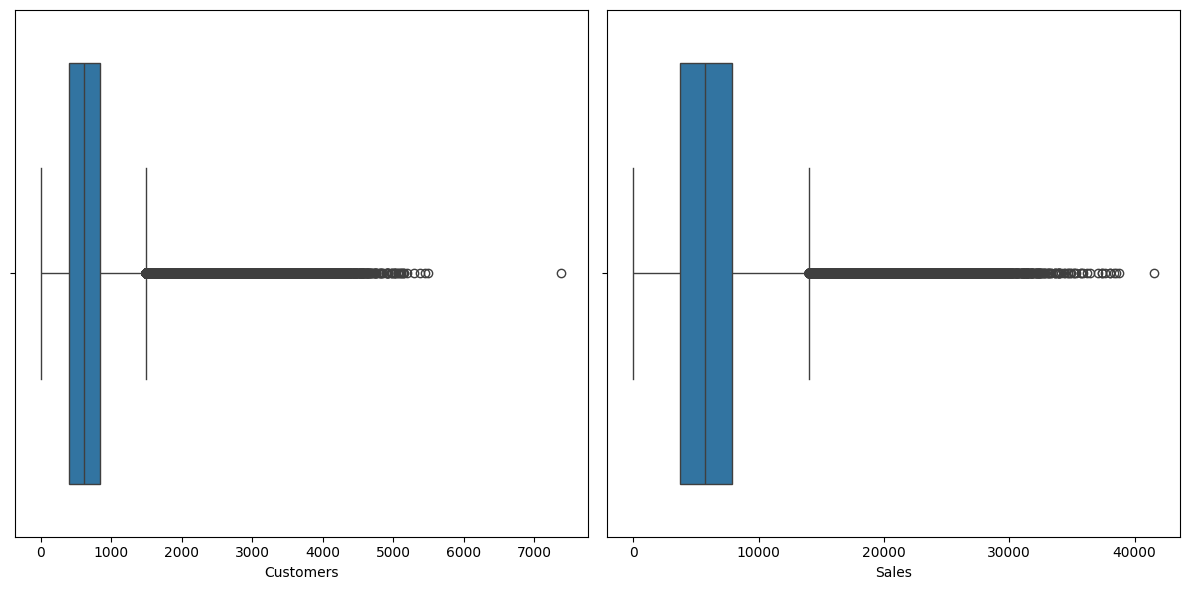

In [26]:
## Let's Check for outliers in Sales and Customers column since they are the only useful columns
de_train.outliers()

In [27]:
### Handle Outliers
de_train.handle_outliers()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,c,a,1270.0,1199145600000000000,2008-01-01,0,0.0,-2208988800000000000,UNKNOWN,5,2015-07-31,5263.0,555.0,1,1,0,1
1,1,c,a,1270.0,1199145600000000000,2008-01-01,0,0.0,-2208988800000000000,UNKNOWN,4,2015-07-30,5020.0,546.0,1,1,0,1
2,1,c,a,1270.0,1199145600000000000,2008-01-01,0,0.0,-2208988800000000000,UNKNOWN,3,2015-07-29,4782.0,523.0,1,1,0,1
3,1,c,a,1270.0,1199145600000000000,2008-01-01,0,0.0,-2208988800000000000,UNKNOWN,2,2015-07-28,5011.0,560.0,1,1,0,1
4,1,c,a,1270.0,1199145600000000000,2008-01-01,0,0.0,-2208988800000000000,UNKNOWN,1,2015-07-27,6102.0,612.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,d,c,5350.0,-2208988800000000000,1900-01-01,1,22.0,1325376000000000000,"Mar,Jun,Sept,Dec",6,2013-01-05,4771.0,339.0,1,0,0,1
1017205,1115,d,c,5350.0,-2208988800000000000,1900-01-01,1,22.0,1325376000000000000,"Mar,Jun,Sept,Dec",5,2013-01-04,4540.0,326.0,1,0,0,1
1017206,1115,d,c,5350.0,-2208988800000000000,1900-01-01,1,22.0,1325376000000000000,"Mar,Jun,Sept,Dec",4,2013-01-03,4297.0,300.0,1,0,0,1
1017207,1115,d,c,5350.0,-2208988800000000000,1900-01-01,1,22.0,1325376000000000000,"Mar,Jun,Sept,Dec",3,2013-01-02,3697.0,305.0,1,0,0,1


### ***Bivariate Analysis***

2025-01-03 21:14:19,755 - INFO - Plotting Bar Charts for bivariate analysis ... 
2025-01-03 21:14:20,268 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:20,721 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:33,995 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:14:34,546 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:15:12,443 - I

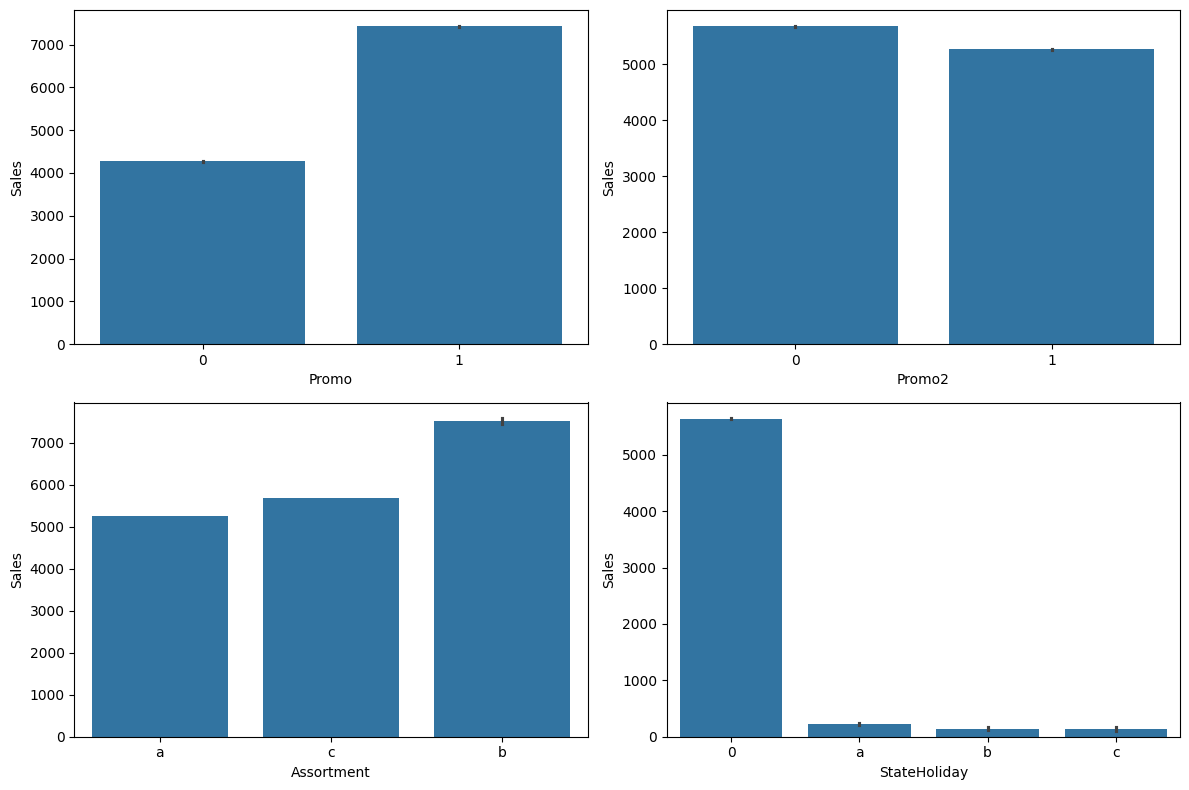

In [28]:
## Bivariate analysis Between Sales and Other features
de_train.bivariate_analysis_1()

##### ***Key Insights***

1. *The effect of Promotion on sales is significantly visible. Sales With Promotion is twice as sales without one.*
2. *The Effect of continous promotion on sales is not that much significant.*
3. *Assortment Type B is dominant in Sales compared to other assortment types.*
4. *Sales on Holidays a=Public Holidays, b=Easter Holiday, c=Christmas are almost non-existent compared to Holidays*


2025-01-03 21:15:12,661 - INFO - Plotting Bar Charts for bivariate analysis ... 
2025-01-03 21:15:13,266 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:15:13,687 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:15:26,845 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:15:27,263 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:15:46,715 - I

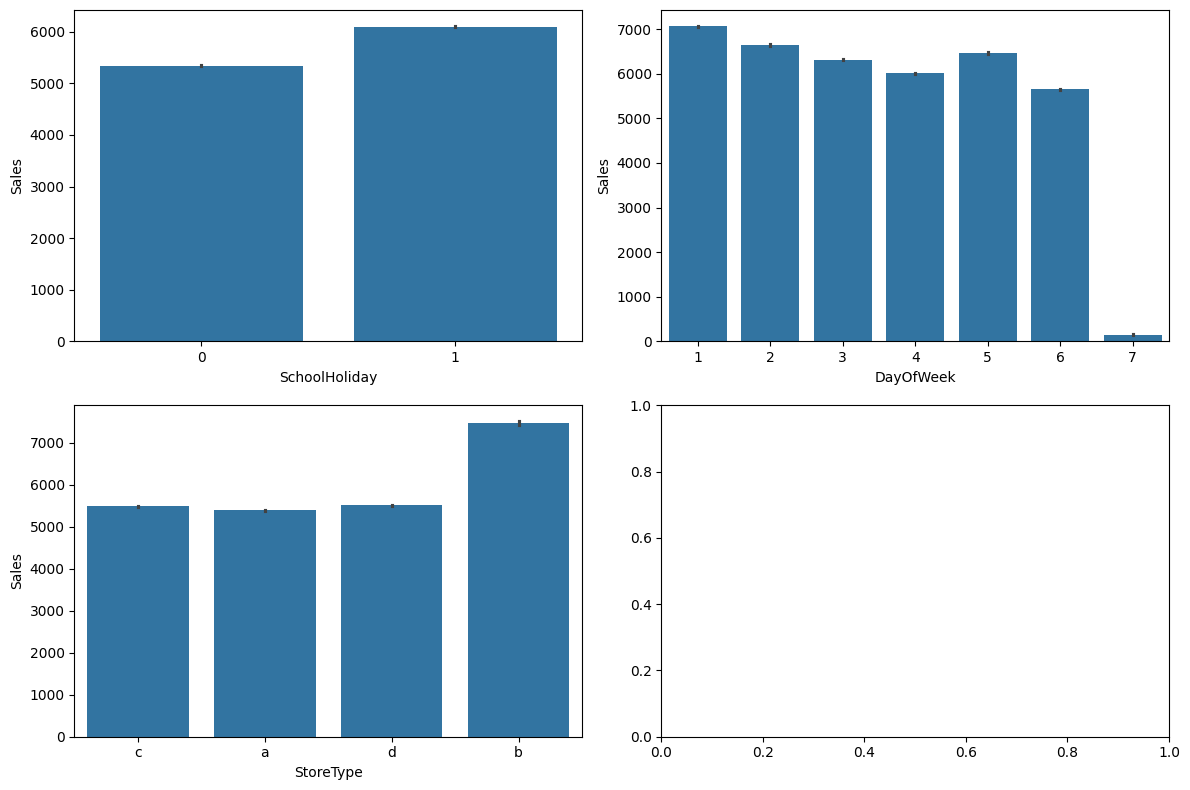

In [29]:
## Bivariate analysis Between Sales and Other features
de_train.bivariate_analysis_2()

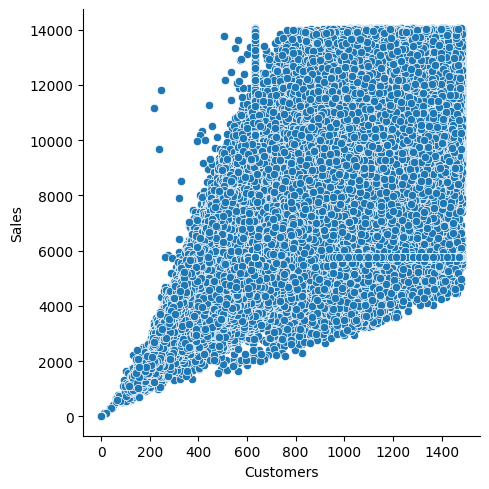

In [30]:
## Relationship between customers and sales
sns.relplot(data=df_train_merged, y='Sales', x='Customers')

<Axes: >

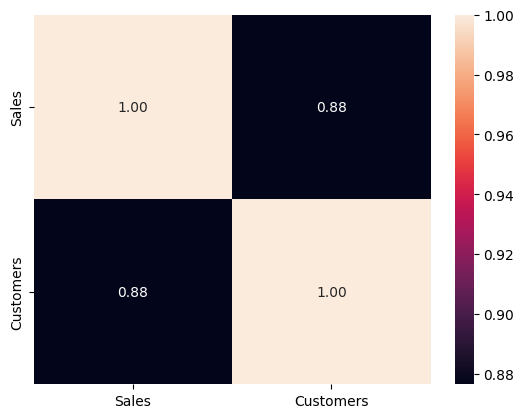

In [31]:
sns.heatmap(df_train_merged[['Sales','Customers']].corr(), annot=True, fmt=".2f")

#### ***Key Insights***

1. The sales difference between for School Holidays is not significant.
2. The First day of the week is when there are a lot of sales, and The last day of the week is when sales is low.
3. Store Type B's are dominant in sales compared to other types which are constant.
4. There is a Strong Positive relationship between Customers and Sales

Text(0.5, 1.0, 'Sales Distribution During, Before and After Public holidays')

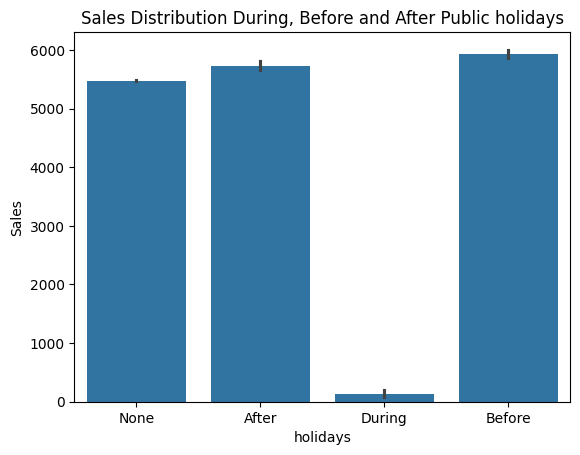

In [32]:
# Define Holiday periods
holiday_date = df_train_merged[df_train_merged['StateHoliday'] == 'a']['Date'].mode()[0]

before_holiday_date = holiday_date - pd.Timedelta(days=7)
after_holiday_date = holiday_date + pd.Timedelta(days=7)

# Update the 'holidays' column based on conditions
df_train_merged['holidays'] = 'None'
df_train_merged.loc[(df_train_merged['Date'] >= before_holiday_date) & (df_train_merged['Date'] < holiday_date), 'holidays'] = 'Before'
df_train_merged.loc[df_train_merged['Date'] == holiday_date, 'holidays'] = 'During'
df_train_merged.loc[(df_train_merged['Date'] > holiday_date) & (df_train_merged['Date'] <= after_holiday_date), 'holidays'] = 'After'

sns.barplot(data=df_train_merged, x='holidays', y='Sales')
plt.title("Sales Distribution During, Before and After Public holidays")


Text(0.5, 1.0, 'Sales Distribution During, Before and After Easter')

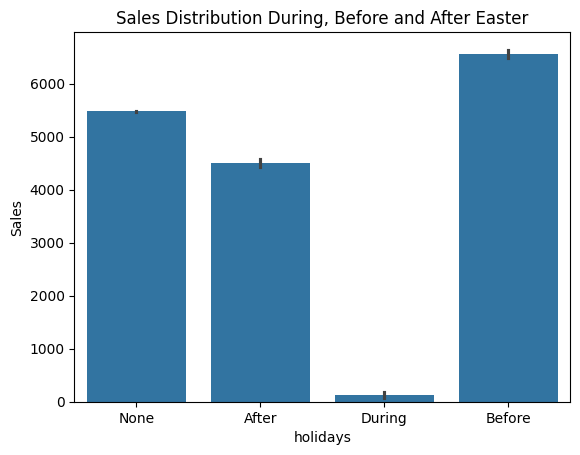

In [33]:
# Define Holiday periods
holiday_date = df_train_merged[df_train_merged['StateHoliday'] == 'b']['Date'].mode()[0]

before_holiday_date = holiday_date - pd.Timedelta(days=7)
after_holiday_date = holiday_date + pd.Timedelta(days=7)

# Update the 'holidays' column based on conditions
df_train_merged['holidays'] = 'None'
df_train_merged.loc[(df_train_merged['Date'] >= before_holiday_date) & (df_train_merged['Date'] < holiday_date), 'holidays'] = 'Before'
df_train_merged.loc[df_train_merged['Date'] == holiday_date, 'holidays'] = 'During'
df_train_merged.loc[(df_train_merged['Date'] > holiday_date) & (df_train_merged['Date'] <= after_holiday_date), 'holidays'] = 'After'

sns.barplot(data=df_train_merged, x='holidays', y='Sales')
plt.title("Sales Distribution During, Before and After Easter")

Text(0.5, 1.0, 'Sales Distribution During, Before and After Christmas')

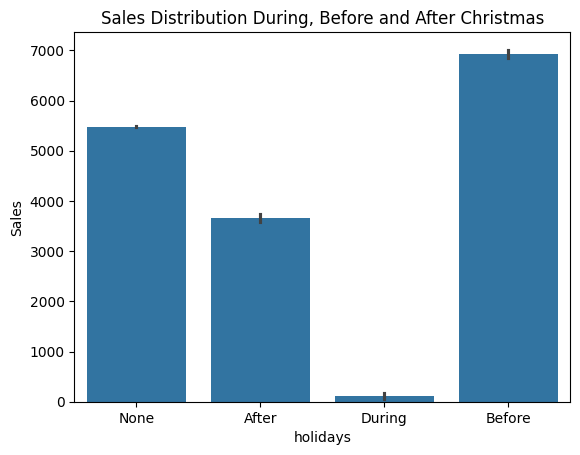

In [34]:
# Define Holiday periods
holiday_date = df_train_merged[df_train_merged['StateHoliday'] == 'c']['Date'].mode()[0]

before_holiday_date = holiday_date - pd.Timedelta(days=7)
after_holiday_date = holiday_date + pd.Timedelta(days=7)

# Update the 'holidays' column based on conditions
df_train_merged['holidays'] = 'None'
df_train_merged.loc[(df_train_merged['Date'] >= before_holiday_date) & (df_train_merged['Date'] < holiday_date), 'holidays'] = 'Before'
df_train_merged.loc[df_train_merged['Date'] == holiday_date, 'holidays'] = 'During'
df_train_merged.loc[(df_train_merged['Date'] > holiday_date) & (df_train_merged['Date'] <= after_holiday_date), 'holidays'] = 'After'

sns.barplot(data=df_train_merged, x='holidays', y='Sales')
plt.title("Sales Distribution During, Before and After Christmas")

#### ***Key Insights***

1. *The sales distribution during Holidays is significantly low for all Holidays.* 
2. *Sales 7 days Before Easter and Christmas Shows Higher number of Sales.*
3. *There is no significant Sales difference Before and After Public Holidays.*


In [35]:
## Data Grouped by Promo
df_promo_grouped = df_train_merged.groupby('Promo').agg({'Sales':'mean', 'Customers':'mean'}).reset_index()
df_promo_grouped

,Promo,Sales,Customers
0,0,4268.790208,476.940032
1,1,7426.857142,744.946184


2025-01-03 21:16:38,900 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:38,907 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:38,924 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:38,929 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:39,410 - INFO - Using categorical units to plot a list of strings that are all parsable as 

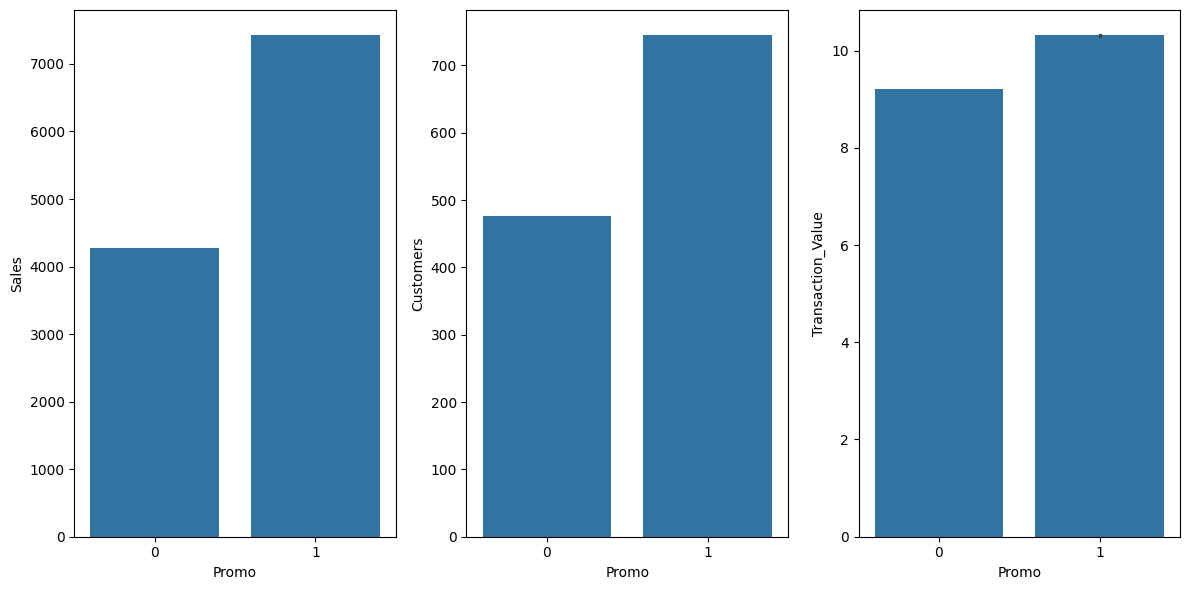

In [36]:
## Assume Transaction value is used the effect of promotion on existing customers
df_train_merged['Transaction_Value'] = df_train_merged['Sales'] / df_train_merged['Customers']

fig, ax = plt.subplots(1,3, figsize=(12,6))
sns.barplot(x='Promo', y='Sales', data=df_promo_grouped, ax=ax[0])
sns.barplot(x='Promo', y='Customers', data=df_promo_grouped,ax=ax[1])
sns.barplot(x='Promo', y='Transaction_Value', data=df_train_merged,ax=ax[2])
plt.tight_layout()
plt.show()

#### ***Key Insights***

1. Avergae Sales are Highly affected by promo.
2. Average Number of Customers increase with promo.
3. Existing Customers tend to buy more when there is promo.

In [37]:
## Group data for Promo2
df_promo2_grouped = df_train_merged.groupby('Promo2').agg({'Sales':'mean', 'Customers':'mean'}).reset_index()
df_promo2_grouped

,Promo2,Sales,Customers
0,0,5678.083276,619.817664
1,1,5269.654443,538.650399


2025-01-03 21:16:48,606 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:48,610 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:48,624 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:48,630 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-01-03 21:16:49,091 - INFO - Using categorical units to plot a list of strings that are all parsable as 

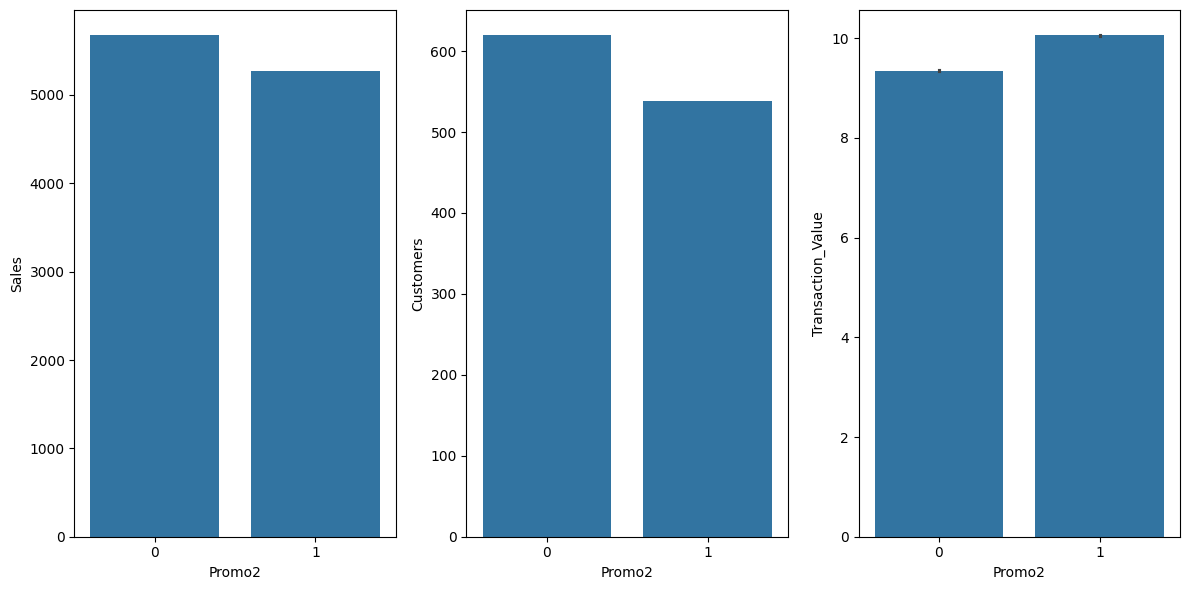

In [38]:
## Plot Relationship between promo2 and Sales and Customer
fig, ax = plt.subplots(1,3, figsize=(12,6))
sns.barplot(x='Promo2', y='Sales', data=df_promo2_grouped, ax=ax[0])
sns.barplot(x='Promo2', y='Customers', data=df_promo2_grouped,ax=ax[1])
sns.barplot(x='Promo2', y='Transaction_Value', data=df_train_merged,ax=ax[2])
plt.tight_layout()
plt.show()

#### ***Key Insights***

1. Avergae Sales is not being affected by promo2.
2. Average Number of Customers is not being affected with promo2.
3. Existing Customers tend to buy more when there is continuous information (promo2).

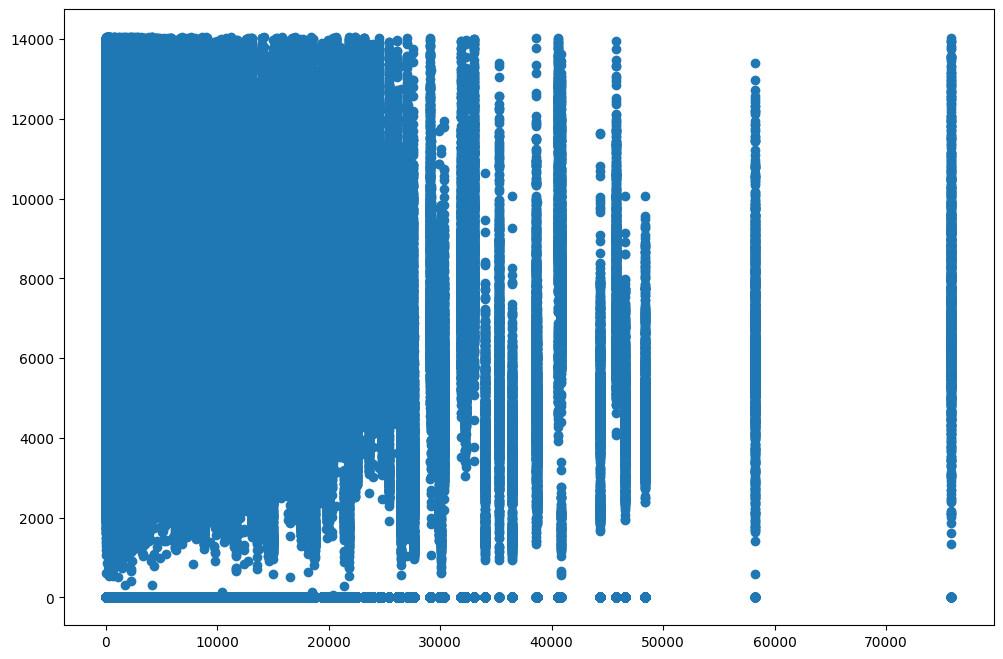

In [39]:
## Relationship between Sales and Promo
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y=df_train_merged['Sales'], x=df_train_merged['CompetitionDistance'])


#### ***Key Insights***

*There is no clear relationship pattern between Competitor distance and Sales amount.*

#### ***Time Series Analysis***

Text(0, 0.5, 'Average Sales')

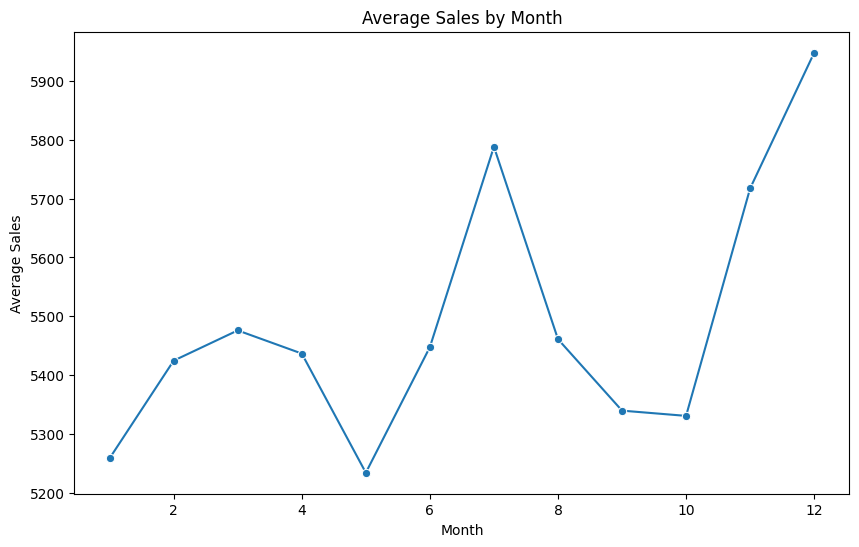

In [40]:
## Sales Data Per month

df_train_merged['Month'] = df_train_merged['Date'].dt.month
seasonal_sales = df_train_merged.groupby('Month')['Sales'].mean().reset_index()
    
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=seasonal_sales, marker='o')
plt.title('Average Sales by Month')
plt.ylabel('Average Sales')

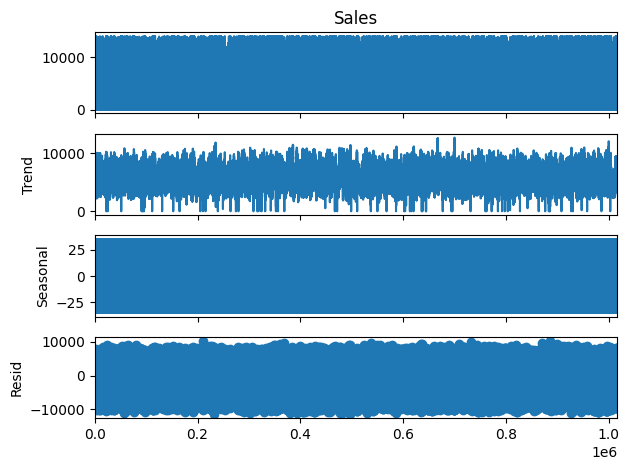

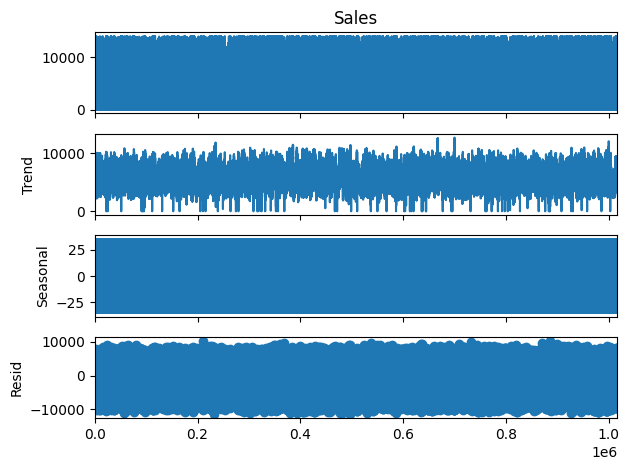

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming `df['Sales']` is your target series
decomposed = seasonal_decompose(df_train_merged['Sales'], model='additive', period=12)  
# Visualize components
decomposed.plot()

#### ***Key Insights***

*The data doesn't show any clear sign of seasonality, and There is no clear trend*